# 🏚️ House Price Prediction

A linear regression model that helps predict prices of houses based on it's features


## ⬇️ Necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## 📂 Load the train and test dataset


In [2]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

## 📅 Check metadata


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(f"Shape of train dataset: {train.shape}")

print(f"Shape of test dataset: {test.shape}")

Shape of train dataset: (1460, 81)
Shape of test dataset: (1459, 80)


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 🤔 Check for missing values


In [8]:
print(f"Missing values in train? {train.isna().values.any()}")

print(f"Missing values in test? {test.isna().values.any()}")

Missing values in train? True
Missing values in test? True


## 🔢 Number of missing values in each column


In [9]:
train.isna().sum()[train.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
test.isna().sum()[test.isna().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## 🥧 Percentage of missing values per column


In [11]:
missing_percent_train = (train.isna().sum() / len(train)) * 100
missing_percent_train[missing_percent_train > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [12]:
missing_percent_test = (test.isna().sum() / len(test)) * 100
missing_percent_test[missing_percent_test > 0]

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

## 〽️ Seperate features and target


In [13]:
y = train["SalePrice"]
X = train.drop("SalePrice", axis=1)

# ➕ Combine train and test for easy pre-processing


In [14]:
all_data = pd.concat([X, test], sort=False)

## ✔️ Handle missing values


In [15]:
numerical_cols = all_data.select_dtypes(include="number").columns
categorical_cols = all_data.select_dtypes(exclude="number").columns

# fill numerical columns with median of all values
all_data[numerical_cols] = all_data[numerical_cols].fillna(
    all_data[numerical_cols].median()
)

# fill categorical columns with the mode
all_data[categorical_cols] = all_data[categorical_cols].fillna(
    all_data[categorical_cols].mode().iloc[0]
)

## ⚙️ Feature Engineering to derive new features


In [16]:
# total square foot of house
all_data["TotalSF"] = (
    all_data["TotalBsmtSF"] + all_data["1stFlrSF"] + all_data["2ndFlrSF"]
)

In [17]:
# total bathrooms in house
all_data["TotalBathRooms"] = (
    all_data["BsmtFullBath"]
    + (all_data["BsmtHalfBath"] * 0.5)
    + all_data["FullBath"]
    + (all_data["HalfBath"] * 0.5)
)

In [18]:
# age of the house
all_data["Age"] = all_data["YrSold"] - all_data["YearBuilt"]

## 🧑🏻‍💻 Encode the categorical columns

Linear Regression cannot understand string values, so we have to encode them to some numerical format


In [19]:
all_data = pd.get_dummies(all_data)

In [20]:
print(f"Shape of the dataset after encoding: {all_data.shape}")

Shape of the dataset after encoding: (2919, 291)


## ➖ Split the data into train and test as pre-processing is done


In [21]:
X_processed = all_data.iloc[: len(X)]
test_processed = all_data.iloc[len(X) :]

## ➖ Split the train data into training and validation set


In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

## 🔗 Build and train the Linear Regression model


In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

## 🟰 Evaluation on validation set


In [25]:
y_pred = model.predict(X_val)

## 👩🏻‍🔬 Calculate the mean squared error (MSE), root mean squared error (RMSE) and R-squared score


In [26]:
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 868842002.98


In [27]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 29476.13


In [28]:
r2 = r2_score(y_val, y_pred)
print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.8867


## 🆕 Predict on the test data


In [29]:
test_pred = model.predict(test_processed)

In [30]:
test_pred

array([118990.82185551, 160970.0014602 , 186299.27813175, ...,
       181214.50754243, 110997.10969478, 223919.78105947])

## 🏁 Save the predictions with the respected ID of the test houses


In [31]:
submission = pd.DataFrame(
    {
        "Id": test["Id"],
        "SalePrice": test_pred,
    }
)

submission.to_csv("house_price_pred.csv", index=False)

## 📊 Visualize the model using plotly, seaborn, and matplotlib


### 🔢 Actual vs Predicted House Prices


In [32]:
df_plot = pd.DataFrame(
    {
        "Actual": y_val,
        "Predicted": y_pred,
    }
)

In [33]:
df_plot.head()

,Actual,Predicted
892,154500,157732.646425
1105,325000,348827.758726
413,115000,86367.240867
522,159000,174041.323838
1036,315500,316987.617262


In [34]:
reg_plot = px.scatter(
    df_plot,
    x="Actual",
    y="Predicted",
    trendline="ols",
)

reg_plot.update_layout(
    title="Actual vs Predicted House Prices",
    xaxis_title="Actual Prices",
    yaxis_title="Predicted Prices",
)

reg_plot.show()

### 📊 Histogram of Target Variable


In [35]:
hist = px.histogram(
    train,
    x="SalePrice",
    nbins=50,
    color="Neighborhood",
)

hist.update_layout(
    title="Distribution Sale Prices",
    xaxis_title="Price",
    yaxis_title="Count",
    template="plotly_white",
)

hist.show()

### 🛳️ Line Plot for Actual vs Predicted prices


In [36]:
df_line = df_plot.sort_values("Actual").reset_index()
line = px.line(
    df_line, y=["Actual", "Predicted"], title="Actual vs Predicted Prices (Line Plot)"
)
line.show()


### 🔥 Correlation Heatmap of Numerical features using seaborn


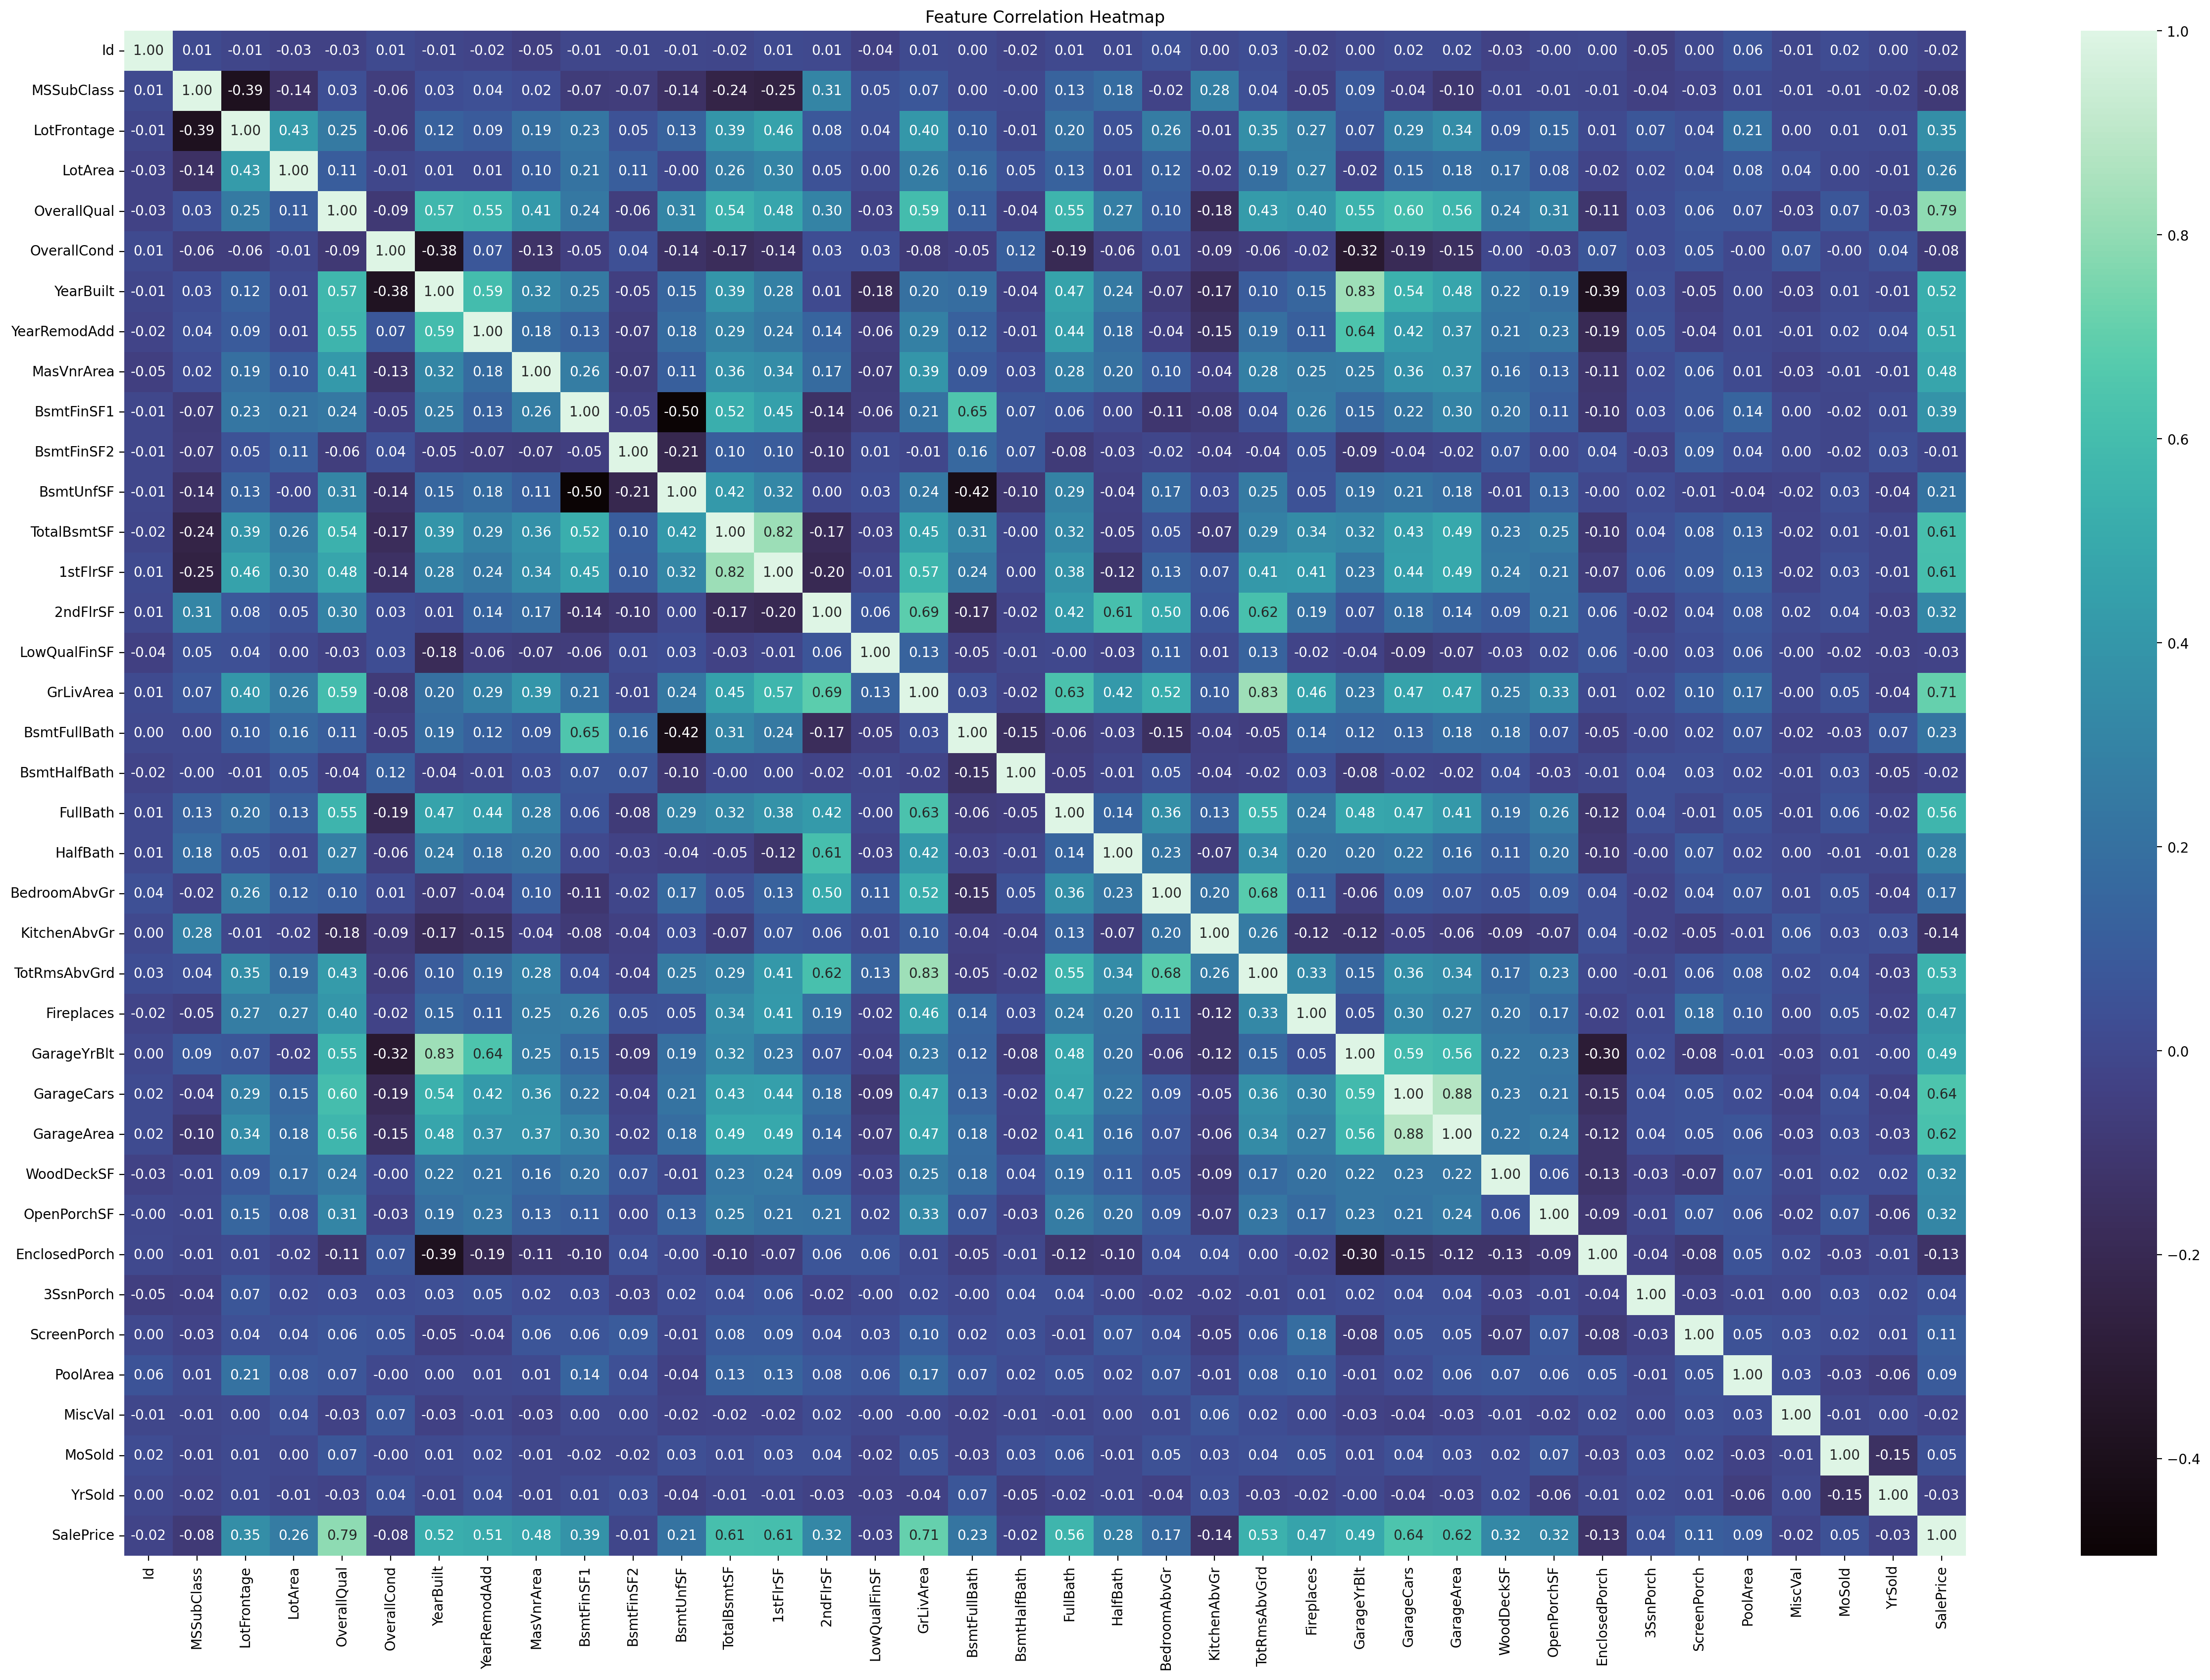

In [37]:
plt.figure(figsize=(30, 20), dpi=200)
numeric_features = train.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap="mako", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### 📈 Compare sample predictions given vs our predictions


In [38]:
sample_df = pd.read_csv("Dataset/sample_submission.csv")
pred_df = pd.read_csv("house_price_pred.csv")

In [39]:
comparison = sample_df.merge(pred_df, on="Id", suffixes=("_sample", "_pred"))
comparison["Difference"] = comparison["SalePrice_sample"] - comparison["SalePrice_pred"]
comparison.head()

,Id,SalePrice_sample,SalePrice_pred,Difference
0,1461,169277.052498,118990.821856,50286.230643
1,1462,187758.393989,160970.001460,26788.392529
2,1463,183583.683570,186299.278132,-2715.594562
3,1464,179317.477511,199521.652501,-20204.174990
4,1465,150730.079977,209958.784384,-59228.704408


### 📊 Histogram of their difference


In [40]:
hist2 = px.histogram(
    comparison,
    x="Difference",
    nbins=50,
    color_discrete_sequence=["#00CC96"],
)

hist2.update_layout(
    title="Difference Between My Predictions and Sample",
    xaxis_title="Sample Prediction - Your Prediction",
    yaxis_title="Number of Houses",
    template="plotly_white",
)

hist2.show()

### 📈 Scatter plot of Saample predictions vs our predictions


In [41]:
scat = px.scatter(
    comparison,
    x="SalePrice_sample",
    y="SalePrice_pred",
    title="Sample vs Prediction",
    labels={
        "SalePrice_sample": "Sample SalePrice",
        "SalePrice_pred": "Predicted SalePrice",
    },
)

scat.add_shape(
    type="line",
    x0=comparison["SalePrice_sample"].min(),
    y0=comparison["SalePrice_sample"].min(),
    x1=comparison["SalePrice_sample"].max(),
    y1=comparison["SalePrice_sample"].max(),
    line=dict(color="Red", dash="dash"),
    name="Ideal: y = x",
)

scat.update_layout(template="plotly_white")
scat.show()
